子基金合成fof产品的净值表现

In [1]:
import numpy as np
import os
import tushare as ts
import pandas as pd
import xlrd
import empyrical as ep
import matplotlib.pyplot as plt
from matplotlib import rc
rc('mathtext', default='regular')

from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings("ignore")
from pyfolio.timeseries import gen_drawdown_table, perf_stats

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

# 读入产品数据
- excel格式，一个sheet对应一个产品
- sheet格式，第一列为日期，第二列为累计净值

In [2]:
file_path = r'./子基金净值表.xlsx'
excel = xlrd.open_workbook(file_path)
sheet_list = excel.sheet_names()
df_list = []
for each in sheet_list:
    df = pd.read_excel(file_path, each, header=0)
    if df.empty:
        continue
    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
    df.set_index(df.iloc[:, 0].name, drop=True, inplace=True)
    df = df.resample('D').asfreq()
    df_list.append(df)
total = pd.concat(df_list, axis=1)
trade_list = ts.pro_api().trade_cal(exchange='SSE', start_date=total.index.min().strftime('%Y%m%d'),
                                    end_date=total.index.max().strftime('%Y%m%d'))
trade_list = trade_list[trade_list['is_open'] == 1]  # 交易日
total = total[total.index.isin(pd.to_datetime(trade_list['cal_date']))]
total = total.apply(pd.Series.interpolate)

total

,桃花岛量化对冲二号,泓倍期权套利1号,格量稳健一号,玉数,天演6号,品赋火炬,明汯,歆享富诚三期
净值日期,,,,,,,,
2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2017-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2017-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2017-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2017-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000400
2017-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000800
2017-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001200
2017-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001600


# 计算日收益率

In [3]:
def value_to_returns(se):
    return se.diff() / se
returns = total.apply(value_to_returns)
returns

,桃花岛量化对冲二号,泓倍期权套利1号,格量稳健一号,玉数,天演6号,品赋火炬,明汯,歆享富诚三期
净值日期,,,,,,,,
2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2017-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2017-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2017-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000400
2017-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000400
2017-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000400
2017-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000399


# 叠加fof和基准指数

## 拼接投资组合

In [4]:
# 设置权重
weight = [0.1, 0.1,0.1,0.1,0.15,0.15,0.15,0.15]
assert len(weight)==len(returns.columns)

In [5]:
def weight_se(se, weight):
    if se.dropna().empty:
        return np.nan
    # na位置
    temp = pd.Series(weight, index=se.index)
    use_se = se[~se.isnull()]
    use_temp = temp[~se.isnull()]
    use_temp = use_temp/use_temp.sum()
    return np.matmul(use_se, use_temp).sum()

new_returns = returns.copy()
new_returns['fof'] = new_returns.apply(weight_se, axis=1, args=(weight,))

## 拼接朝阳永续指数

- 网站下载数据后，需要调整excel中时间列以外的列，为数值格式。
- 剔除不用的，只保留value,用于计算日收益率。

In [6]:
bench_mark = pd.read_excel('./朝阳私募指数.xls', 0, header=0, na_values=['--'])
bench_mark = bench_mark.set_index(bench_mark.iloc[:, 0].name)
bench_mark.index = pd.to_datetime(bench_mark.index)
bench_mark = bench_mark[(bench_mark.index>=total.index.min())&(bench_mark.index<=total.index.max())]
bench_returns = bench_mark.apply(value_to_returns)

In [7]:
total_returns = new_returns.join(bench_returns)
total_value = total_returns.cumsum()+1.0
total_value.to_csv('./out_combine/子基金加权合成.csv', encoding='gbk')
total_value

,桃花岛量化对冲二号,泓倍期权套利1号,格量稳健一号,玉数,天演6号,品赋火炬,明汯,歆享富诚三期,fof,沪深300,组合基金
净值日期,,,,,,,,,,,
2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.996157,0.999630
2017-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.992216,0.999578
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.989649,0.999525
2017-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.983192,0.997938
2017-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000400,1.000400,0.976124,0.997567
2017-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000800,1.000800,0.974251,0.997567
2017-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001199,1.001199,0.969808,0.997197
2017-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001598,1.001598,0.975453,0.997091


# 测算表现

## 统计指标

In [8]:
def stats_se(se):
    stats = perf_stats(se)
    stats['VaR'] = np.percentile(se.dropna(), 100 * 0.05)
    stats = stats.append(gen_drawdown_table(se, top=1).iloc[0, :])
    return stats

def stats_df(df):
    result = df.apply(stats_se)
    result['mean'] = result.T.mean()
    result['max_min'] = result.apply(lambda x: x.max() - x.min(), axis=1)
    return result

In [9]:
stats_df(total_returns)

,桃花岛量化对冲二号,泓倍期权套利1号,格量稳健一号,玉数,天演6号,品赋火炬,明汯,歆享富诚三期,fof,沪深300,组合基金,mean,max_min
Annual return,0.0570973,0.0883787,0.127438,0.192973,0.143195,0.0681837,0.179676,0.145558,0.165233,0.0172472,0.0170585,0.109276,0.175914
Cumulative returns,0.140841,0.222587,0.329279,0.520006,0.373791,0.169438,0.480111,0.380539,0.437469,0.0414136,0.0409552,0.285130,0.479051
Annual volatility,0.0390974,0.0169342,0.0309714,0.207659,0.0173893,0.0194461,0.028338,0.0193197,0.0184992,0.19284,0.0254717,0.055997,0.190725
Sharpe ratio,5.72184,6.94889,5.4157,2.83702,8.53371,8.39407,6.41452,7.05718,8.29193,0.185313,0.681268,5.498312,8.34839
Calmar ratio,1.87857,7.31182,8.90811,2.30387,9.8761,8.83778,3.31681,7.73642,11.0238,0.0487253,0.262657,5.591334,10.9751
Stability,0.817146,0.928222,0.896873,0.960971,0.975889,0.966532,0.869811,0.979686,0.957085,0.212127,0.010517,0.779533,0.969169
Max drawdown,-0.030394,-0.0120871,-0.0143058,-0.08376,-0.0144992,-0.00771503,-0.0541714,-0.0188147,-0.0149888,-0.353968,-0.064946,-0.060877,0.346253
Omega ratio,2.45482,5.26228,3.1208,1.80957,4.8618,5.92424,3.02865,4.7106,5.2216,1.03317,1.17065,3.508926,4.89108
Sortino ratio,12.0485,20.7415,12.4919,5.25639,22.7887,25.4312,14.719,18.2061,20.8425,0.258446,0.980437,13.978604,25.1728
Skew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 净值图

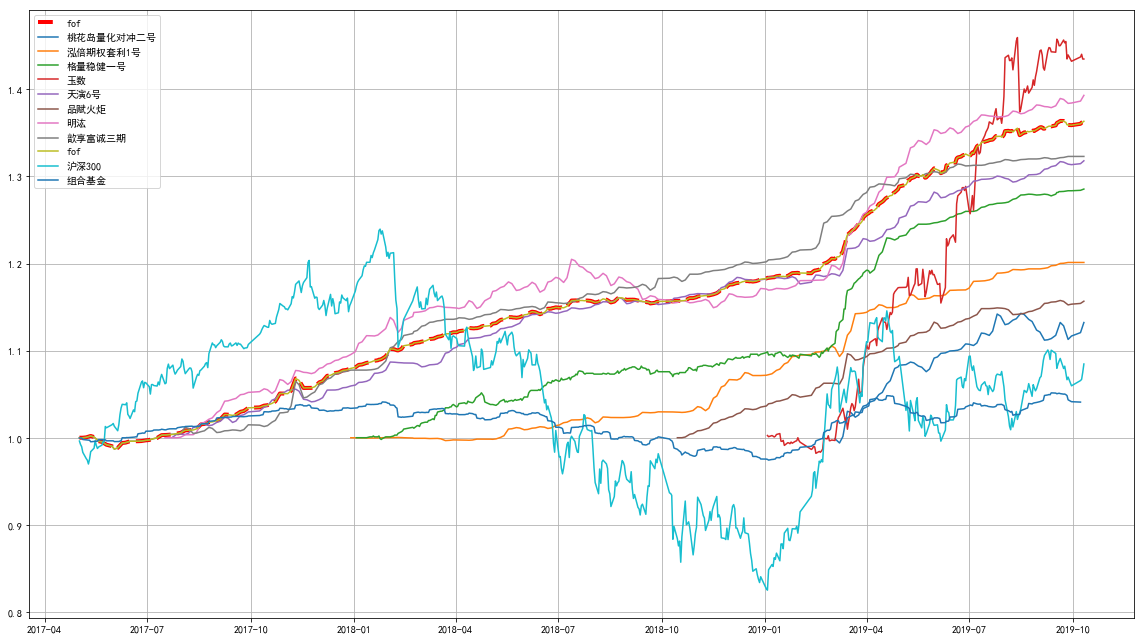

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(16,9))
fig.set_tight_layout(True)
ax1 = fig.add_subplot(111)
ax1.grid()

ax1.plot(total_value.index, total_value['fof'], linewidth=4, color='red',linestyle='--')  # fof突出显示

for col in total_value.columns:
    data = total_value[col]
    ax1.plot(data.index, data.values, label=data.name)

ax1.legend(loc=2)